In [1]:
# this is needed in Google Collab to upgrade matplotlib to the latest in kernel
!pip install matplotlib==3.5.1

# College Analysis


- Exploratory Data Analysis Project
- Mike LaPoint
- NYU Tandon School of Engineering

# Development

- Working with my son on college search
    - Reach, target and likely schools
    - Find good programs
    - SAT and ACT scores
- Google site and compiling data in a spreadsheet
    - manual and error prone
    - data age
- Department of Education data - College Scorecard
    - latest data from source
- Comprehensive Data available through API

# Challenges

- Understanding the API and JSON data
- Overloading Google Colab and Jupyter Lab
- 20 school limit / paging
- Number of columns
- Parsing JSON
- Visualizations
    - Stacked bar charts
- Statistical data is provided
    - 25th and 75th percentiles
    - Score means
    - bxp chart

# Final Approach

- Loop through and lookup one school at a time
- Parse required data from JSON - only what is needed
- Tune in pandas
- Manipulate for visualizations

# Libraries

- pandas
- numpy
- matplotlib and samples
- json
- folium

# College Analysis

My son is getting ready for college and we are trying to help him figure out schools and what to apply for based on his interstests.  Google has a lot of good data on webpages.  The project started by collecting data manually from Google and inputing into a Numbers spreadsheet.  After reading more and more I realized that there was additional data that we needed such as 25th percentile of SAT scores in order to figure out reach, target and secure schools.  After some research (links from the Google data) I found College Scorecard site.

The College Scorecard site is provided by the U.S. Department of Education and provides information gathered from many universities and colleges in the U.S.  I first found an API and after doing some testng found out a few things.  The data is challenging to search and acquire, the documentation is prety sparse and it's hard to figure out how to get what you need.  The data set is quite large, I think about 8000 rows by something like 3200 columns.  Finding what you need can be a challenge, I found a JSON editor that helped to see the hierachy within the JSON file.  The data is available in pages on the API so you have to run a bunch of queries into the API to collect each of the pages of data.

Which approach to use?  The API can provide specific fields of data, but the URL is limited to  2048 bytes.  It may be necessary to consturct dataframes by doing multiple queries into the API and merging new data into the data frame.  Anther approach is to use the API to gather all fields, again this would require parsing the JSON dictionary and extracting out specific fields; this would need to be done for each page of the data and the dataframe would need to be assembled.  I also found another site that provides CSV files of the data, the file is around 250 MB with a lot of columns, this might be the simplest apprach but it requires downloading the data set for the latest data, the API has the benefit of always providing the latest.

In the end I chose to use the API to pull JSON data and figured out how to parse it to optimize the returend data

## College Lookup

The cell below will enable you to lookup college Unit IDs.  These can be added to the listing below for data analysis

The school name field in the data set allows querying with a list of words. To search for a given word or string of words in those fields, just provide a list of space-separated words. This will return all records where the given field contains the given words as part of a string. Note that all given words have to be at least three characters long.

For example: To search for school names containing the words New York, enter New York

Note results are limited to 20 so you may need to extend the search term to narrow results

In [183]:
import json as js_lookup
import pandas as pd_lookup
from urllib.request import urlopen as urlopen_lookup
import urllib.parse as parse_lookup

college_name_in = input('Please enter the college/university name or a portion of the name (default is "New York"):')
if (college_name_in):
    college_name_in = parse_lookup.quote(college_name_in)
else:
    college_name_in =parse_lookup.quote('New York')     
#print (college_name_in)

url_college_lookup = 'https://api.data.gov/ed/collegescorecard/v1/schools.json?school.name=' + college_name_in + '&fields=school.name,id'
url_api = '&api_key='
api_key = 'VBkEw5RCWs47G5cXoHAhQ0aK7Ew0bEV5X1rs56rt'

response = urlopen_lookup(url_college_lookup + url_api + api_key)
data_json_college_lookup = js_lookup.loads(response.read())
  
# print the json response
#print(data_json_college_lookup)
schools_lookup_df = pd_lookup.json_normalize(data_json_college_lookup, record_path =['results'])
print(schools_lookup_df)
print(schools_lookup_df.shape)

del schools_lookup_df, data_json_college_lookup, response, api_key, url_api, url_college_lookup, college_name_in, parse_lookup, urlopen_lookup, pd_lookup, js_lookup

Please enter the college/university name or a portion of the name (default is "New York"): new york


                                         school.name      id
0             New York College of Podiatric Medicine  194073
1           CUNY New York City College of Technology  190655
2                          DeVry College of New York  482413
3          State University of New York at New Paltz  196176
4                     St. John's University-New York  195809
5                          Berkeley College-New York  189228
6   New York College of Traditional Chinese Medicine  439783
7                   New York Institute of Technology  194091
8              Barber & Beauty Institute of New York  476610
9                      New York Chiropractic College  193751
10               Glasgow Caledonian New York College  494551
11                          New York Medical College  193830
12                               New York Law School  193821
13        Robert Fiance Beauty Schools-West New York  185767
14         Gemological Institute of America-New York  191311
15        CUNY Graduate 

## Target schools

Update the list below with the schools you would like to include in any analysis below.  The cell must be run in order to run subsequent cells.

In [2]:
target_school_unitids = [
    '189097', #Barnard College
    '164988', #Boston University
    #'161004', #Bowdoin College
    #'110404', #California Institute of Technology
    '165015', #Brandeis University
    '211440', #Carnegie Mellon University
    '201645', #Case Western Reserve University
    '161086', #Colby College
    '190150', #Columbia University
    '190415', #Cornell University
    '182670', #Dartmouth College
    #'212577', #Franklin and Marshall College
    '212911', #Haverford
    '162928', #John Hopkins University
    '213543', #Lehigh University
    '193900', #NYU
    '186131', #Princeton
    '194824', #Rensselaer Polytechnic Institute
    '216287', #Swarthmore College
    '168148', #Tufts University
    '144050', #University of Chicago
    '145637', #University of Illinois Urbana-Champaign
    '163286', #University of Maryland-College Park
    '166629', #University of Massachusetts-Amherst
    '215293', #University of Pittsburgh-Pittsburgh Campus 
    '195030', #University of Rochester
    '168342', #Williams College
    '130794' #Yale
]

## Show mapping of target schools

The cell below will enable you to display a map with the locations of all of the target schools specified above.

In [3]:
import pandas as pd_map
#pd_programs_perc.set_option('display.max_rows', 500)
#pd_programs_perc.set_option('display.max_columns', 500)
#pd_programs_perc.set_option('display.width', 175)
import json as json_map
from urllib.request import urlopen as url_map

#test URL for cal tech:  https://api.data.gov/ed/collegescorecard/v1/schools.json?id=110404&api_key=VBkEw5RCWs47G5cXoHAhQ0aK7Ew0bEV5X1rs56rt

base_url_map = 'https://api.data.gov/ed/collegescorecard/v1/schools.json?'
url_api_map = '&api_key='
api_key_map = 'VBkEw5RCWs47G5cXoHAhQ0aK7Ew0bEV5X1rs56rt'
df_map = None

for s_id in target_school_unitids:
    query_url_map = 'id=' + s_id
    #print(base_url_programs_perc + query_url_programs_perc + url_api_programs_perc + api_key_programs_perc)
    response = url_map(base_url_map + query_url_map + url_api_map + api_key_map)
    js_map = json_map.loads(response.read())
    if (df_map is None):
        df_map = pd_map.json_normalize(js_map['results'][0]['location'])
        df_map['name'] = pd_map.json_normalize(js_map['results'][0]['latest']['school'])['name']
    else:
        df_map_temp = pd_map.json_normalize(js_map['results'][0]['location'])
        df_map_temp['name'] = pd_map.json_normalize(js_map['results'][0]['latest']['school'])['name']
        df_map = pd_map.concat([df_map, df_map_temp], axis=0, join="outer", ignore_index = True)
df_map.rename(columns={'lat':'lat', 'lon':'lon','name':'school_name'}, inplace=True)
import folium
m = folium.Map(location=[df_map.lat.mean(), df_map.lon.mean()], zoom_start=6)
for index, row in df_map.iterrows():
    folium.Marker(location=[row.lat, row.lon], popup=row.school_name, icon=folium.Icon(color="red", icon="info-sign"),).add_to(m)
m
#del df_map, js_map, response, query_url_map, s_id, api_key_map, url_api_map, base_url_map, url_map, json_map, pd_map

## Enter Test Scores

The cell below will enable you to enter SAT and ACT test scores.  These will be used for analysis in the remainder of the notebook

In [4]:
sat_math_in = input("Please enter your SAT Math score (default=700):")
if sat_math_in.isnumeric():
    sat_math = int(sat_math_in)
else:
    sat_math = 700  
sat_read_in = input("Please enter your SAT Reading score (default=700):")
if sat_read_in.isnumeric():
    sat_read = int(sat_read_in)
else:
    sat_read = 700
act_in = input("Please enter your ACT score (default=31):")
if act_in.isnumeric():
    act = int(act_in)
else:
    act = 31
    
print('Scores SAT math, SAT reading, ACT:  ', sat_math, sat_read, act)

# variables used in later cells so I have not deleted objects....

Please enter your SAT Math score (default=700): 
Please enter your SAT Reading score (default=700): 
Please enter your ACT score (default=31): 


Scores SAT math, SAT reading, ACT:   700 700 31


## Display Test Scores with Selected Schools

The cells below will chart how your scores compare to scores of admitted students in the last year at the selected schools.  Note that the ranges are Q1 to Q3 or the 25th and 75th percentile which reflects the target range for the school.

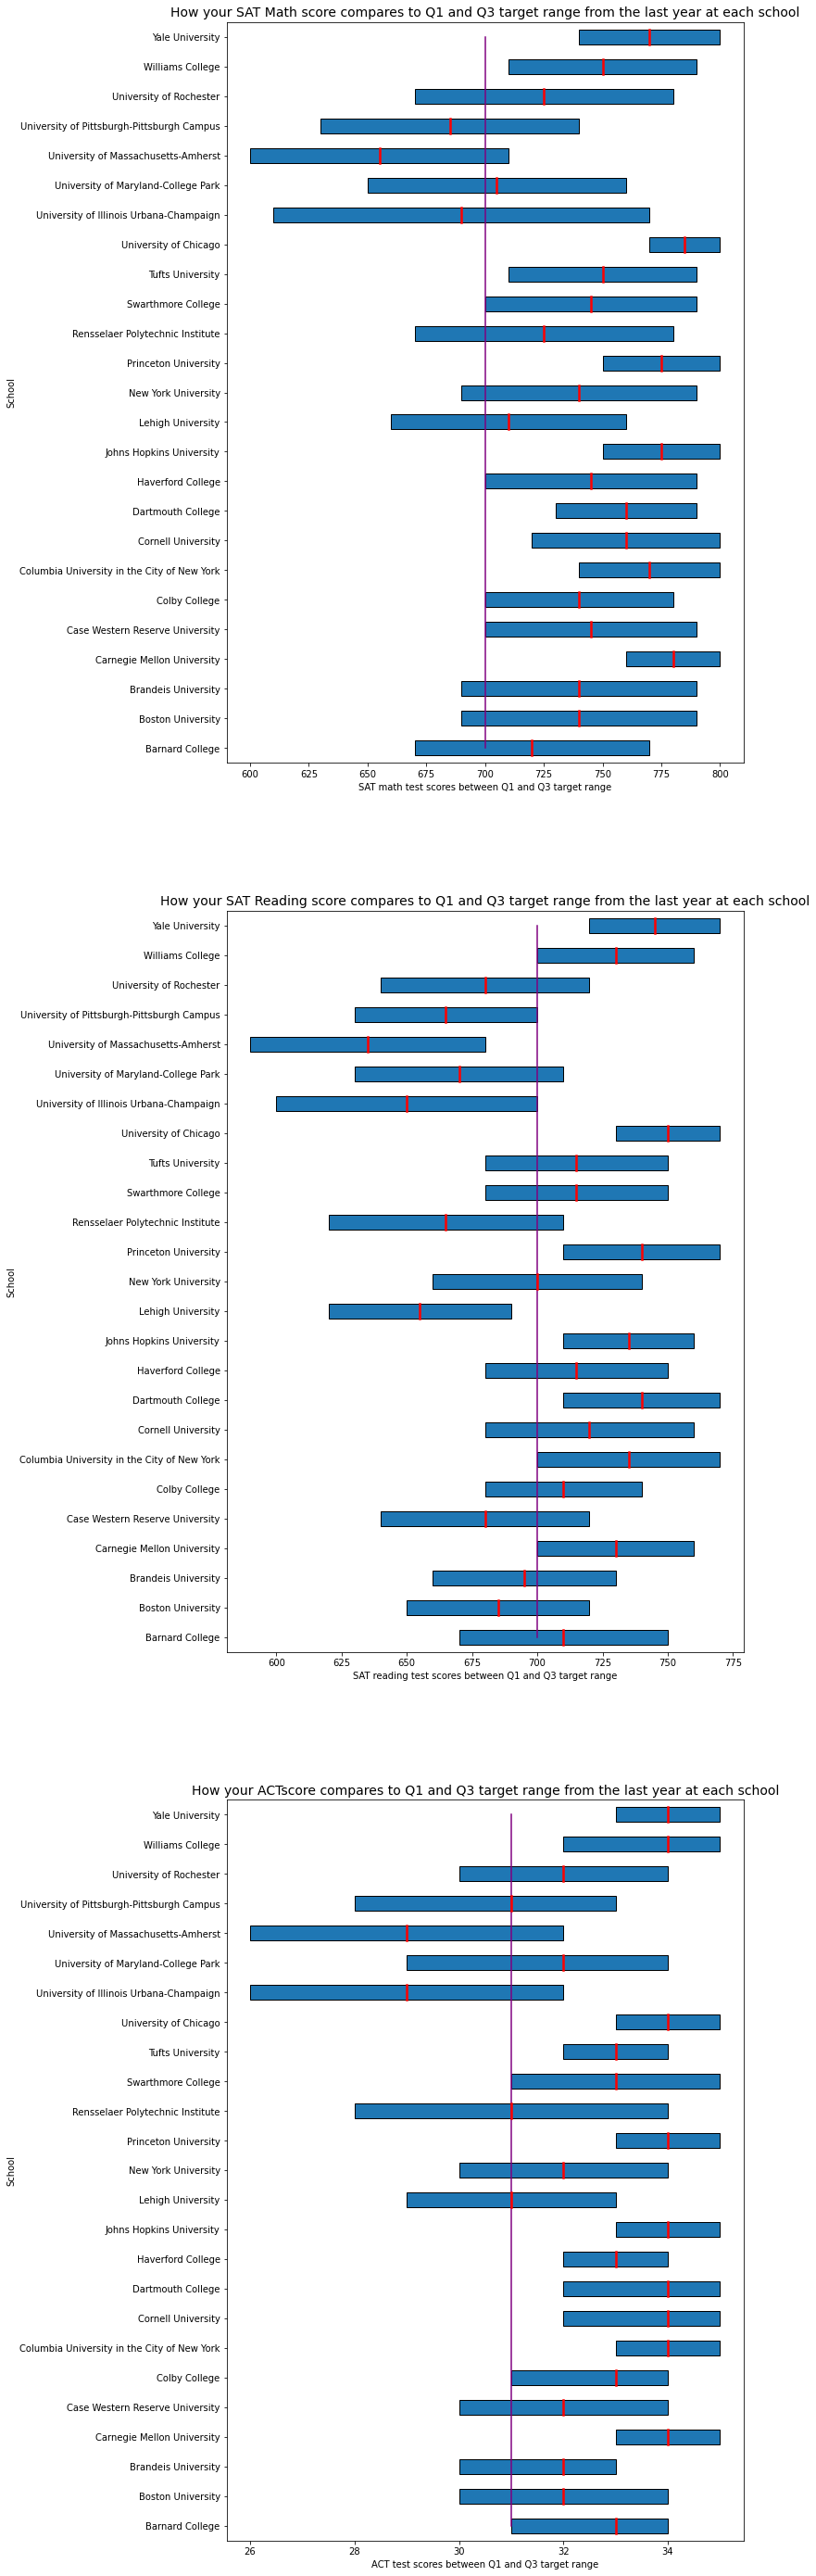

In [5]:
import pandas as pd_data
import json as json_data
from urllib.request import urlopen as url_data

"""
List of fileds in the dataset used in the dataframe, added here for reference only
fields_in_dataset = [
    'school.name',
    'school.city',
    'school.state',
    'latest.admissions.admission_rate.consumer_rate',
    'latest.admissions.sat_scores.25th_percentile.math',
    'latest.admissions.sat_scores.25th_percentile.writing',
    'latest.admissions.sat_scores.25th_percentile.critical_reading',
    'latest.admissions.sat_scores.75th_percentile.math',
    'latest.admissions.sat_scores.75th_percentile.writing',
    'latest.admissions.sat_scores.75th_percentile.critical_reading',
    'latest.admissions.sat_scores.midpoint.math',
    'latest.admissions.sat_scores.midpoint.writing',
    'latest.admissions.sat_scores.midpoint.critical_reading',
    'latest.admissions.act_scores.25th_percentile.math',
    'latest.admissions.act_scores.25th_percentile.writing',
    'latest.admissions.act_scores.75th_percentile.math',
    'latest.admissions.act_scores.75th_percentile.writing',
    'latest.admissions.act_scores.midpoint.math',
    'latest.admissions.act_scores.midpoint.writing'
]
"""

#test URL for cal tech:  https://api.data.gov/ed/collegescorecard/v1/schools.json?id=110404&api_key=VBkEw5RCWs47G5cXoHAhQ0aK7Ew0bEV5X1rs56rt

base_url_data = 'https://api.data.gov/ed/collegescorecard/v1/schools.json?'
url_api_data = '&api_key='
api_key_data = 'VBkEw5RCWs47G5cXoHAhQ0aK7Ew0bEV5X1rs56rt'
df_schools = None

for s_id in target_school_unitids:
    query_url_data = 'id=' + s_id
    #print(base_url_data + query_url_data + url_api_data + api_key_data)
    response = url_data(base_url_data + query_url_data + url_api_data + api_key_data)
    js_data = json_data.loads(response.read())
    if (df_schools is None):
        df_schools = pd_data.json_normalize(js_data, record_path =['results'])
    else:
        df_schools = pd_data.concat([df_schools, pd_data.json_normalize(js_data, record_path =['results'])], axis=0, join="outer", ignore_index=True)

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

f, (axs1, axs2, axs3) = plt.subplots(3, 1, figsize=(10,50))
df_schools_scores_sat_math = df_schools[['school.name',
                                        'latest.admissions.sat_scores.25th_percentile.math',
                                        'latest.admissions.sat_scores.midpoint.math',
                                        'latest.admissions.sat_scores.75th_percentile.math']].copy()
df_schools_scores_sat_math.rename(columns={'school.name': 'label',
                                           'latest.admissions.sat_scores.25th_percentile.math':'q1',
                                           'latest.admissions.sat_scores.midpoint.math':'med',
                                           'latest.admissions.sat_scores.75th_percentile.math':'q3'}, inplace=True)
df_schools_scores_sat_math['whislo'] = df_schools_scores_sat_math['q1']
df_schools_scores_sat_math['whishi'] = df_schools_scores_sat_math['q3']
stats = df_schools_scores_sat_math.to_dict(orient='records')

medianprops = dict(linestyle='-', linewidth=2.5, color='red')
plot = axs1.bxp(stats, showfliers=False, vert=False, meanline=True, medianprops = medianprops, patch_artist=True)
#print(plot)
#for p in plot['boxes']:
    #print(p.get_extents().xmin)
    #print(p.get_extents().xmax)
    #p.set(color = 'purple', alpha = .5)

pointsy1 = np.arange(1, df_schools_scores_sat_math.shape[0] + 1, 1)
pointsy2 = np.full(df_schools_scores_sat_math.shape[0], sat_math)
plotline = axs1.plot(pointsy2, pointsy1, color ='purple')

#print ('\n')
#for pl in plotline:
    #print(pl.get_path().get_extents().xmin)


axs1.set_xlabel('SAT math test scores between Q1 and Q3 target range')
axs1.set_ylabel('School')
axs1.set_title('How your SAT Math score compares to Q1 and Q3 target range from the last year at each school', fontsize=14)

df_schools_scores_sat_reading = df_schools[['school.name',
                                        'latest.admissions.sat_scores.25th_percentile.critical_reading',
                                        'latest.admissions.sat_scores.midpoint.critical_reading',
                                        'latest.admissions.sat_scores.75th_percentile.critical_reading']].copy()
df_schools_scores_sat_reading.rename(columns={'school.name': 'label',
                                           'latest.admissions.sat_scores.25th_percentile.critical_reading':'q1',
                                           'latest.admissions.sat_scores.midpoint.critical_reading':'med',
                                           'latest.admissions.sat_scores.75th_percentile.critical_reading':'q3'}, inplace=True)
df_schools_scores_sat_reading['whislo'] = df_schools_scores_sat_reading['q1']
df_schools_scores_sat_reading['whishi'] = df_schools_scores_sat_reading['q3']
stats = df_schools_scores_sat_reading.to_dict(orient='records')

medianprops = dict(linestyle='-', linewidth=2.5, color='red')
plot = axs2.bxp(stats, showfliers=False, vert=False, meanline=True, medianprops = medianprops, patch_artist=True)

pointsy1 = np.arange(1, df_schools_scores_sat_reading.shape[0] + 1, 1)
pointsy2 = np.full(df_schools_scores_sat_reading.shape[0], sat_read)
axs2.plot(pointsy2, pointsy1, color ='purple')

axs2.set_xlabel('SAT reading test scores between Q1 and Q3 target range')
axs2.set_ylabel('School')
axs2.set_title('How your SAT Reading score compares to Q1 and Q3 target range from the last year at each school', fontsize=14)

df_schools_scores_act = df_schools[['school.name',
                                        'latest.admissions.act_scores.25th_percentile.cumulative',
                                        'latest.admissions.act_scores.midpoint.cumulative',
                                        'latest.admissions.act_scores.75th_percentile.cumulative']].copy()
df_schools_scores_act.rename(columns={'school.name': 'label',
                                           'latest.admissions.act_scores.25th_percentile.cumulative':'q1',
                                           'latest.admissions.act_scores.midpoint.cumulative':'med',
                                           'latest.admissions.act_scores.75th_percentile.cumulative':'q3'}, inplace=True)
df_schools_scores_act['whislo'] = df_schools_scores_act['q1']
df_schools_scores_act['whishi'] = df_schools_scores_act['q3']
stats = df_schools_scores_act.to_dict(orient='records')

medianprops = dict(linestyle='-', linewidth=2.5, color='red')
plot = axs3.bxp(stats, showfliers=False, vert=False, meanline=True, medianprops = medianprops, patch_artist=True)

pointsy1 = np.arange(1, df_schools_scores_act.shape[0] + 1, 1)
pointsy2 = np.full(df_schools_scores_act.shape[0], act)
axs3.plot(pointsy2, pointsy1, color ='purple')

axs3.set_xlabel('ACT test scores between Q1 and Q3 target range')
axs3.set_ylabel('School')
axs3.set_title('How your ACTscore compares to Q1 and Q3 target range from the last year at each school', fontsize=14)

del axs3, axs2, axs1, pointsy2, pointsy1, plot, medianprops, stats,df_schools_scores_act,df_schools_scores_sat_reading,df_schools_scores_sat_math, np, plt,df_schools
del api_key_data, url_api_data, base_url_data, url_data, json_data, pd_data

## Display Programs in Selected Target Schools

The code below will display the percentages for each program in the target schools specified.

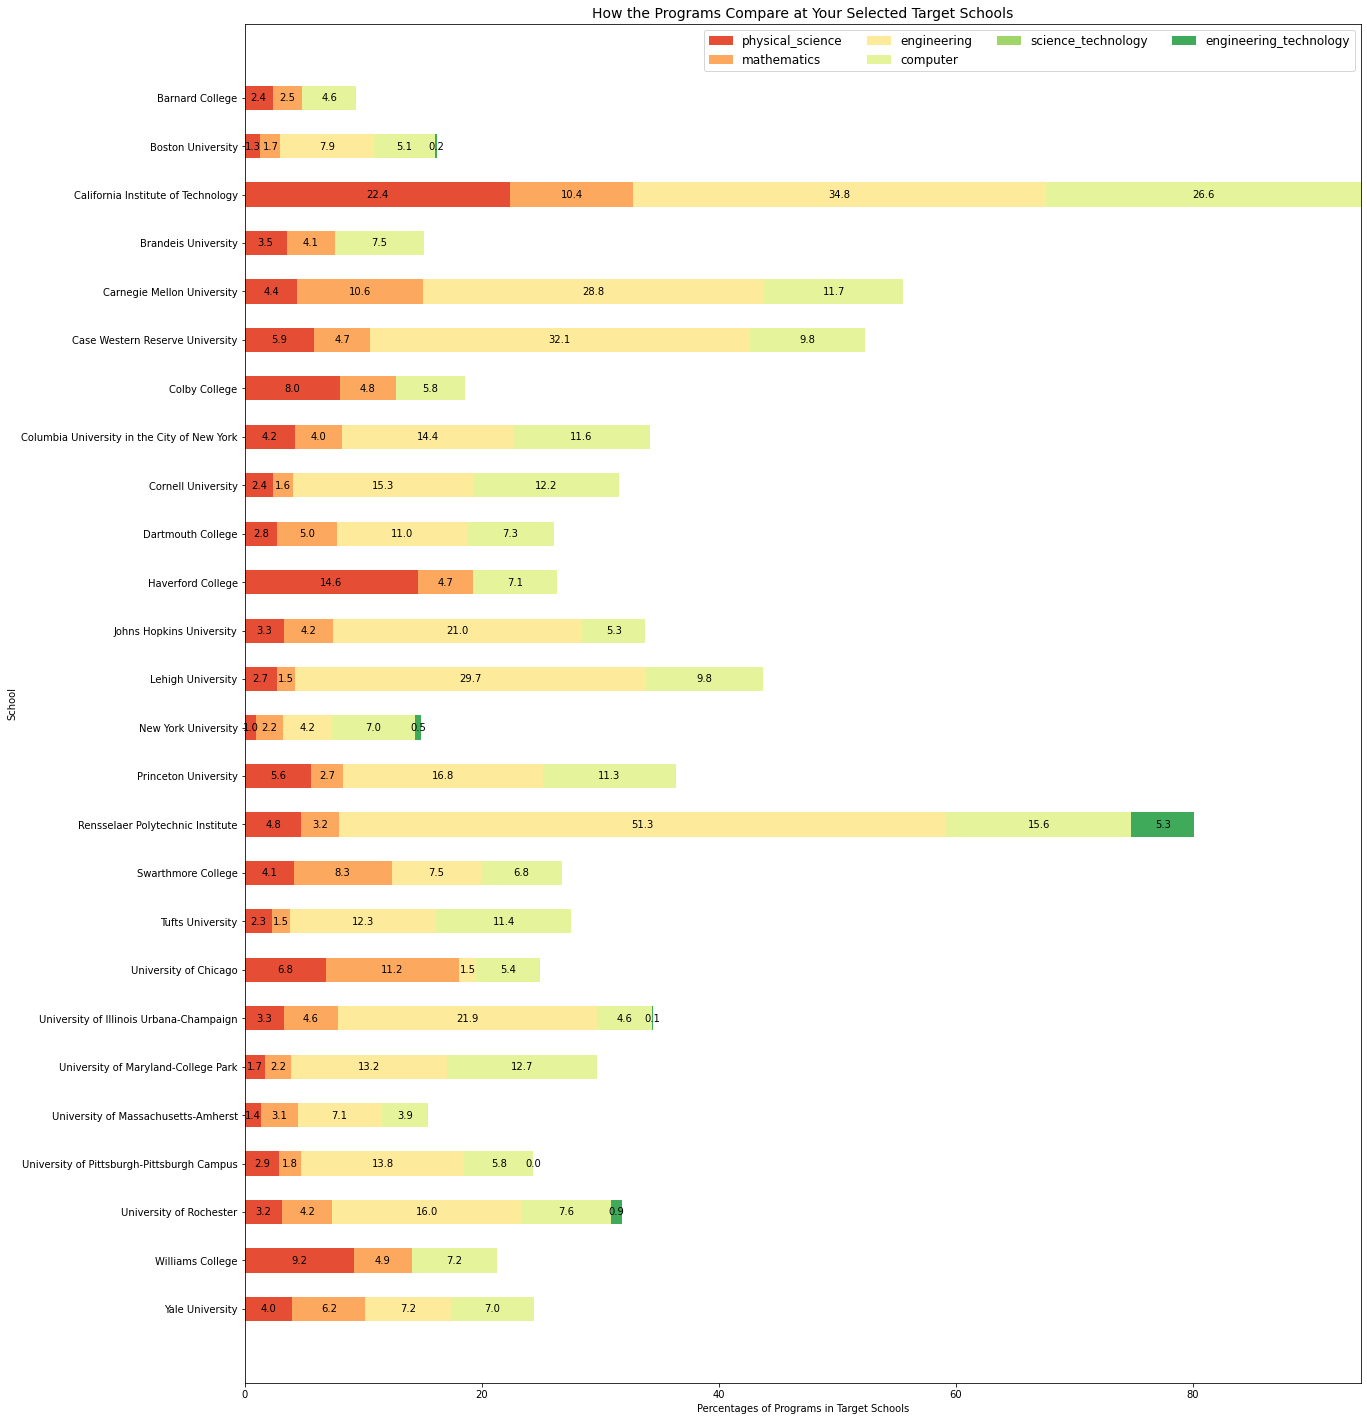

In [209]:
import pandas as pd_programs_perc
#pd_programs_perc.set_option('display.max_rows', 500)
#pd_programs_perc.set_option('display.max_columns', 500)
pd_programs_perc.set_option('display.width', 175)
import json as json_programs_perc
from urllib.request import urlopen as url_programs_perc

#test URL for cal tech:  https://api.data.gov/ed/collegescorecard/v1/schools.json?id=110404&api_key=VBkEw5RCWs47G5cXoHAhQ0aK7Ew0bEV5X1rs56rt

base_url_programs_perc = 'https://api.data.gov/ed/collegescorecard/v1/schools.json?'
url_api_programs_perc = '&api_key='
api_key_programs_perc = 'VBkEw5RCWs47G5cXoHAhQ0aK7Ew0bEV5X1rs56rt'
df_programs_perc = None

for s_id in target_school_unitids:
    query_url_programs_perc = 'id=' + s_id
    #print(base_url_programs_perc + query_url_programs_perc + url_api_programs_perc + api_key_programs_perc)
    response = url_programs_perc(base_url_programs_perc + query_url_programs_perc + url_api_programs_perc + api_key_programs_perc)
    js_programs_perc = json_programs_perc.loads(response.read())
    if (df_programs_perc is None):
        df_programs_perc = pd_programs_perc.json_normalize(js_programs_perc['results'][0]['latest']['academics']['program_percentage'])
        df_programs_perc['name'] = pd_programs_perc.json_normalize(js_programs_perc['results'][0]['latest']['school'])['name']
    else:
        df_programs_temp = pd_programs_perc.json_normalize(js_programs_perc['results'][0]['latest']['academics']['program_percentage'])
        df_programs_temp['name'] = pd_programs_perc.json_normalize(js_programs_perc['results'][0]['latest']['school'])['name']
        df_programs_perc = pd_programs_perc.concat([df_programs_perc, df_programs_temp], axis=0, join="outer", ignore_index = True)
#print (df_programs_perc.shape)
#print (df_programs_perc)
#print (df_programs_perc.info())
#print (df_programs_perc.columns)

programs_to_chart = [
    'physical_science',
    'mathematics',
    'engineering',
    'computer',
    'science_technology',
    'engineering_technology'
]
"""
    List of all available programs, copy and paste the ones you want above in the order you would like to see them displayed.
    'legal',
    'health',
    'english',
    'history',
    'library',
    'computer',
    'language',
    'military',
    'education',
    'resources',
    'biological',
    'humanities',
    'psychology',
    'agriculture',
    'engineering',
    'mathematics',
    'architecture',
    'construction',
    'communication',
    'social_science',
    'transportation',
    'multidiscipline',
    'physical_science',
    'personal_culinary',
    'visual_performing',
    'business_marketing',
    'science_technology',
    'philosophy_religious',
    'precision_production',
    'engineering_technology',
    'ethnic_cultural_gender',
    'family_consumer_science',
    'parks_recreation_fitness',
    'security_law_enforcement',
    'communications_technology',
    'mechanic_repair_technology',
    'theology_religious_vocation',
    'public_administration_social_service'
"""

df_programs_perc_subset = df_programs_perc[programs_to_chart].copy()

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

category_names = programs_to_chart
labels = np.array(list(df_programs_perc['name']))
data = df_programs_perc_subset.to_numpy() * 100
data_cum = data.cumsum(axis=1)
category_colors = plt.colormaps['RdYlGn'](np.linspace(0.15, 0.85, data.shape[1]))
fig, ax = plt.subplots(figsize=(20,25))
ax.invert_yaxis()
#ax.xaxis.set_visible(False)
ax.set_xlim(0, np.sum(data, axis=1).max())

for i, (colname, color) in enumerate(zip(category_names, category_colors)):
    widths = data[:, i]
    starts = data_cum[:, i] - widths 
    rects = ax.barh(labels, widths, left=starts, height=0.5,label=colname, color=color)
    r, g, b, _ = color
    #text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
    for p in rects:
        x, y = p.get_xy()
        w, h = p.get_width(), p.get_height()
        if w > 0:  # anything that have a height of 0 will not be annotated 
            ax.text(x + 0.5 * w, y + 0.5 * h, '%0.1f'%w, va='center', ha='center')
    #ax.bar_label(rects, label_type='center', color=text_color)
#ax.legend(ncol=2, bbox_to_anchor=(0, 1), loc='upper right', fontsize='large')
ax.legend(ncol=4, loc='upper right', fontsize='large')
ax.set_xlabel('Percentages of Programs in Target Schools')
ax.set_ylabel('School')
ax.set_title('How the Programs Compare at Your Selected Target Schools', fontsize=14)
plt.show()

del p, x, y, w, h, r, g, b, rects, starts, widths, category_names, category_colors, data_cum, data, labels, np, plt, ax, fig, df_programs_perc_subset, programs_to_chart, df_programs_perc, df_programs_temp
del js_programs_perc, response, query_url_programs_perc, api_key_programs_perc,url_api_programs_perc, base_url_programs_perc, url_programs_perc, json_programs_perc, pd_programs_perc
#text_color, 

## Find Degrees in Selected Target Schools

The code below will display the number of degrees and types in the target schools specified.

In [143]:
import pandas as pd_degrees
pd_degrees.set_option('display.max_rows', 500)
#pd_degrees.set_option('display.max_columns', 500)
pd_degrees.set_option('display.width', 175)
pd_degrees.set_option('display.max_colwidth', 75)
import json as json_degrees
from urllib.request import urlopen as url_degrees

#test URL for cal tech:  https://api.data.gov/ed/collegescorecard/v1/schools.json?id=110404&api_key=VBkEw5RCWs47G5cXoHAhQ0aK7Ew0bEV5X1rs56rt

base_url_degrees = 'https://api.data.gov/ed/collegescorecard/v1/schools.json?'
url_api_degrees = '&api_key='
api_key_degrees = 'VBkEw5RCWs47G5cXoHAhQ0aK7Ew0bEV5X1rs56rt'
df_degrees = None

for s_id in target_school_unitids:
    query_url_degrees = 'id=' + s_id
    #print(base_url_programs_perc + query_url_programs_perc + url_api_programs_perc + api_key_programs_perc)
    # Don't need to optimize this json parse since everything is in the hierachy
    response_degrees = url_degrees(base_url_degrees + query_url_degrees + url_api_degrees + api_key_degrees)
    js_degrees = json_degrees.loads(response_degrees.read())
    if (df_degrees is None):
        df_degrees = pd_degrees.json_normalize(js_degrees['results'][0]['latest']['programs'], record_path = 'cip_4_digit')
    else:
        df_degrees = pd_degrees.concat([df_degrees, pd_degrees.json_normalize(js_degrees['results'][0]['latest']['programs'], record_path = 'cip_4_digit')], axis=0, join="outer", ignore_index=True)
#print(df_degrees.shape)
#print (df_degrees.columns)
df_degrees_subset = df_degrees[['title',
                                  'school.name',
                                  #'code',
                                  #'credential.level',
                                  'credential.title',
                                 'counts.ipeds_awards1',
                                 'counts.ipeds_awards2']].copy()
df_degrees_subset['counts.ipeds_awards1'] = df_degrees_subset['counts.ipeds_awards1'].fillna(0)
df_degrees_subset['counts.ipeds_awards2'] = df_degrees_subset['counts.ipeds_awards2'].fillna(0)
df_degrees_subset['avg_ipeds_awards'] = (df_degrees_subset['counts.ipeds_awards1'] + df_degrees_subset['counts.ipeds_awards2']) / 2
df_degrees_subset.drop(['counts.ipeds_awards1', 'counts.ipeds_awards2'], axis=1, inplace=True)
print (df_degrees_subset.shape)
print (df_degrees_subset)
#def must add this

(5115, 4)
                                                      title      school.name                   credential.title  avg_ipeds_awards
0              Natural Resources Conservation and Research.  Barnard College                   Bachelors Degree              18.0
1                                             Architecture.  Barnard College                   Bachelors Degree               9.0
2                      Architectural History and Criticism.  Barnard College                   Bachelors Degree               0.0
3                                             Area Studies.  Barnard College                   Bachelors Degree              42.5
4     Ethnic, Cultural Minority, Gender, and Group Studies.  Barnard College                   Bachelors Degree              13.0
...                                                     ...              ...                                ...               ...
5110             Finance and Financial Management Services.  Yale University    

In [149]:
degree_in = str(input("Please enter the degree you would like to search for:")).lower()
df_degrees_subset['title_search'] = df_degrees_subset['title'].str.lower()
df_degrees_bachelors = df_degrees_subset.loc[df_degrees_subset['title_search'].str.contains(degree_in)].loc[df_degrees_subset['credential.title'] == 'Bachelors Degree']
df_degrees_masters = df_degrees_subset.loc[df_degrees_subset['title_search'].str.contains(degree_in)].loc[df_degrees_subset['credential.title'] == "Master's Degree"]
df_degrees_doctoral = df_degrees_subset.loc[df_degrees_subset['title_search'].str.contains(degree_in)].loc[df_degrees_subset['credential.title'] == 'Doctoral Degree']

print('Bachelors Degrees')
print(df_degrees_bachelors.drop(['title_search'], axis=1))
print("\nMaster's Degrees")
print(df_degrees_masters.drop(['title_search'], axis=1))
print('\nDoctoral Degrees')
print(df_degrees_doctoral.drop(['title_search'], axis=1))                      


Please enter the degree you would like to search for: physics


Bachelors Degrees
                                                title                                  school.name  credential.title  avg_ipeds_awards
14    Biochemistry, Biophysics and Molecular Biology.                              Barnard College  Bachelors Degree              10.5
28                        Astronomy and Astrophysics.                              Barnard College  Bachelors Degree               0.0
30                                           Physics.                              Barnard College  Bachelors Degree               6.0
149   Biochemistry, Biophysics and Molecular Biology.                            Boston University  Bachelors Degree             117.0
207                       Astronomy and Astrophysics.                            Boston University  Bachelors Degree              12.0
216                                          Physics.                            Boston University  Bachelors Degree              22.5
360                              Engi

## Target Degrees

Update the list below with the degrees you would like to include in any analysis below. The cell must be run in order to run subsequent cells.

In [181]:
target_degrees = [ 
    #Note the string must be copied exactly from above (most entries hava a trailing period)
    'Astronomy and Astrophysics.',
    'Aerospace, Aeronautical and Astronautical Engineering.',
    'Physics.',
    #'Engineering Physics.',
    #'Mathematics.',
    #'Applied Mathematics.',
    #'Mathematics and Statistics, Other.',
    #'Mathematics and Computer Science.',
    #'Computer and Information Sciences, General.',
    #'Computer Programming.',
    #'Computer/Information Technology Administration and Management.',
    #'Computer and Information Sciences and Support Services, Other.',
    #'Computer Systems Networking and Telecommunications.',
    #'Computer Science.',
    'Physical Sciences, Other.',
    'Physical Sciences.',
    #'Engineering Science.',
    #'Mechanical Engineering.',
    #'Computer Engineering.',
    #'Electrical, Electronics and Communications Engineering.',
    #'Chemical Engineering.',
    #'Civil Engineering.',
    #'Environmental/Environmental Health Engineering.',
    #'Materials Engineering',
    #'Engineering Mechanics.',
    'Nuclear Engineering.',
    #'Industrial Engineering.',
    #'Computer Engineering Technologies/Technicians.',
    #'Mechatronics, Robotics, and Automation Engineering.',
    #'Civil Engineering Technologies/Technicians.',
    #'Electrical Engineering Technologies/Technicians.',
    #'Mechanical Engineering Related Technologies/Technicians.',
    #'Computer Engineering Technologies/Technicians.' 
]

print(target_degrees)

['Astronomy and Astrophysics.', 'Aerospace, Aeronautical and Astronautical Engineering.', 'Physics.', 'Physical Sciences, Other.', 'Physical Sciences.', 'Nuclear Engineering.']


## Display Target Bachelors Degrees in Selected Target Schools

The code below will display the number of degrees and types in the target schools specified.

Note this is an average of degrees over 2 years

load degrees for each shool with counts
filter down to bachelors
pivot to row for each shool with columns containing degree counts
chart the results


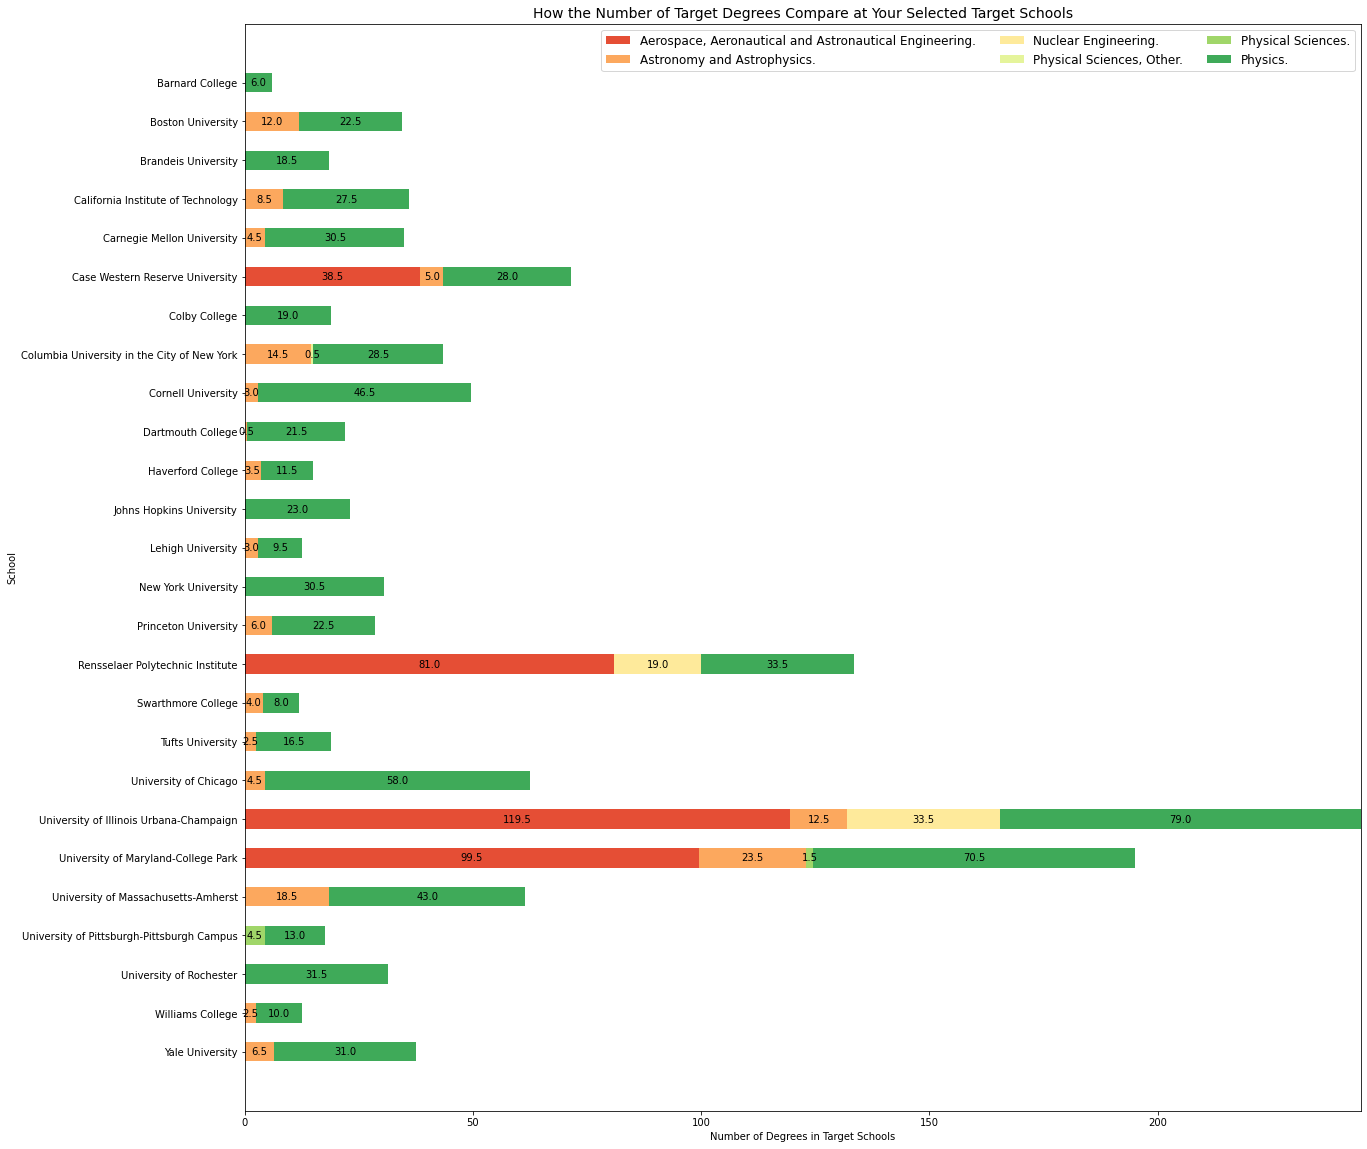

In [212]:
import pandas as pd_degrees_comparison
pd_degrees_comparison.set_option('display.max_rows', 500)
#pd_degrees.set_option('display.max_columns', 500)
pd_degrees_comparison.set_option('display.width', 175)
pd_degrees_comparison.set_option('display.max_colwidth', 75)
import json as json_degrees_comparison
from urllib.request import urlopen as url_degrees_comparison

#test URL for cal tech:  https://api.data.gov/ed/collegescorecard/v1/schools.json?id=110404&api_key=VBkEw5RCWs47G5cXoHAhQ0aK7Ew0bEV5X1rs56rt
base_url_degrees_comparison = 'https://api.data.gov/ed/collegescorecard/v1/schools.json?'
url_api_degrees_comparison = '&api_key='
api_key_degrees_comparison = 'VBkEw5RCWs47G5cXoHAhQ0aK7Ew0bEV5X1rs56rt'
df_degrees_comparison = None

for s_id in target_school_unitids:
    query_url_degrees_comparison = 'id=' + s_id
    #print(base_url_programs_perc + query_url_programs_perc + url_api_programs_perc + api_key_programs_perc)
    # Don't need to optimize this json parse since everything is in the hierachy
    response_degrees_comparison = url_degrees_comparison(base_url_degrees_comparison + query_url_degrees_comparison + url_api_degrees_comparison + api_key_degrees_comparison)
    js_degrees_comparison = json_degrees_comparison.loads(response_degrees_comparison.read())
    if (df_degrees_comparison is None):
        df_degrees_comparison = pd_degrees_comparison.json_normalize(js_degrees_comparison['results'][0]['latest']['programs'], record_path = 'cip_4_digit')
    else:
        df_degrees_comparison = pd_degrees_comparison.concat([df_degrees_comparison, pd_degrees_comparison.json_normalize(js_degrees_comparison['results'][0]['latest']['programs'], record_path = 'cip_4_digit')], axis=0, join="outer", ignore_index=True)
#print(df_degrees.shape)
#print (df_degrees.columns)
df_degrees_comparison_subset = df_degrees_comparison[['title',
                                  'school.name',
                                  #'code',
                                  #'credential.level',
                                  'credential.title',
                                 'counts.ipeds_awards1',
                                 'counts.ipeds_awards2']].copy()
df_degrees_comparison_subset['counts.ipeds_awards1'] = df_degrees_comparison_subset['counts.ipeds_awards1'].fillna(0)
df_degrees_comparison_subset['counts.ipeds_awards2'] = df_degrees_comparison_subset['counts.ipeds_awards2'].fillna(0)
df_degrees_comparison_subset['avg_ipeds_awards'] = (df_degrees_comparison_subset['counts.ipeds_awards1'] + df_degrees_comparison_subset['counts.ipeds_awards2']) / 2
df_degrees_comparison_subset.drop(['counts.ipeds_awards1', 'counts.ipeds_awards2'], axis=1, inplace=True)
#print (df_degrees_comparison_subset.shape)
#print (df_degrees_comparison_subset)
#def must add this

df_degrees_bachelors_comparison = df_degrees_comparison_subset.loc[df_degrees_comparison_subset['credential.title'] == 'Bachelors Degree']

df_degrees_bachelors_comparison = df_degrees_bachelors_comparison.loc[df_degrees_bachelors_comparison['title'].isin(target_degrees)]
df_degrees_bachelors_comparison.drop(['credential.title'], axis=1, inplace=True)

df_pivot_degrees = df_degrees_bachelors_comparison.pivot(index = 'school.name', columns = 'title', values = 'avg_ipeds_awards')
df_pivot_degrees.fillna(0, inplace = True)
#print (df_pivot_degrees.info())

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
category_names = list(df_pivot_degrees.columns)
labels = np.array(list(df_pivot_degrees.index))
data = df_pivot_degrees.to_numpy()
data_cum = data.cumsum(axis=1)
category_colors = plt.colormaps['RdYlGn'](np.linspace(0.15, 0.85, data.shape[1]))
# RdYlGn tab20c
fig, ax = plt.subplots(figsize=(20, 20))
ax.invert_yaxis()
ax.set_xlim(0, np.sum(data, axis=1).max())

for i, (colname, color) in enumerate(zip(category_names, category_colors)):
    widths = data[:, i]
    starts = data_cum[:, i] - widths 
    rects = ax.barh(labels, widths, left=starts, height=0.5,label=colname, color=color)
    r, g, b, _ = color
    #text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
    for p in rects:
        x, y = p.get_xy()
        w, h = p.get_width(), p.get_height()
        if w > 0:  # anything that have a height of 0 will not be annotated 
            ax.text(x + 0.5 * w, y + 0.5 * h, '%0.1f'%w, va='center', ha='center')
    #ax.bar_label(rects, label_type='center', color=text_color)
ax.legend(ncol=3, loc='upper right', fontsize='large')
ax.set_xlabel('Number of Degrees in Target Schools')
ax.set_ylabel('School')
ax.set_title('How the Number of Target Degrees Compare at Your Selected Target Schools', fontsize=14)
plt.show()

del p, x, y, w, h, r, g, b, rects, starts, widths, category_names, category_colors, data_cum, data, labels, np, plt, ax, fig, df_pivot_degrees,df_degrees_bachelors_comparison,df_degrees_comparison_subset
del df_degrees_comparison, response_degrees_comparison, query_url_degrees_comparison, api_key_degrees_comparison, url_api_degrees_comparison, base_url_degrees_comparison, url_degrees_comparison
del json_degrees_comparison, pd_degrees_comparison
#text_color